# The Riddler

A town of 1,000 households has a strange law intended to prevent wealth-hoarding. On January 1 of every year, each household robs one other household, selected at random, moving all of that house’s money into their own house. The order in which the robberies take place is also random and is determined by a lottery. (Note that if House A robs House B first, and then C robs A, the houses of A and B would each be empty and C would have acquired the resources of both A and B.)

Two questions about this fateful day:

1. What is the probability that a house is not robbed over the course of the day?
1. Suppose that every house has the same amount of cash to begin with — say $100. Which position in the lottery has the most expected cash at the end of the day, and what is that amount?

## Part one

> What is the probability that a house is not robbed over the course of the day?

We will assume that a house cannot rob itself, so if there are 1000 houses, there are 999 times a house can be robbed.  The probability of being robbed each time is independent from round to round.  The probability of not being robbed in a single round is $\frac{999}{1000}$ and the probability of not being robbed in any given two rounds is $\frac{999}{1000}^2$.  The probability of not being robbed in 999 rounds is $\frac{999}{1000}^{999}$ which works out to 0.368063.

We assume a house cannot rob itself, so for 1000 rounds there are only 999 chances of being robbed.

In [53]:
(999/1000)**999

0.3680634882592229

Let's plot the probability of any one house not getting robbed if there are N homes.

In [7]:
%matplotlib inline

1000    0.368063
dtype: float64


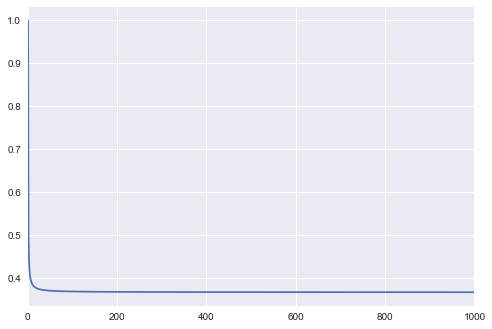

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns

idx = range(1, 1001)
s = pd.Series([((i-1)/i)**(i-1) for i in idx], index=idx)
print(s.tail(1))
s.plot()

In [58]:
1/np.e

0.36787944117144233

## Part two

> Suppose that every house has the same amount of cash to begin with — say $100. Which position in the lottery has the most expected cash at the end of the day, and what is that amount?

Assumption: people do not choose themselves to rob.

Some notation:

- $N$ is the number of houses.  It is 1000 in this example, but we will consider it a fixed variable.
- $X$ is the value that each house starts with.  It is \$100 in this example.
- The current round is $r$ and starts at 1 and goes to N.
    - There are $r-1$ houses before and $N-r$ houses after.
- The probability of not being robbed in $n$ rounds is $P(n)$ where<br>
$P(n) = (\frac{N-1}{N})^n$
- $E_{r,i}$ is the expected value of the house at position $r$ at the conclusion of turn $i$.
- $G_r$ is the expected value of the gain for the turn of the house at position $r$.

And some assumptions:

- People cannot randomly pick themselves to rob.

### Solution

This problem can be broken down into three parts, where we consider a house at position $r$.

1. What is the expected value of house $r$ at the beginning of the turn?
2. What is the expected value of the gain of house $r$?
3. What is the expected value for house $r$ at the end of all rounds?

For part one, the expected value of house $r$ at the beginning of the turn is just the starting value times the probability of not being robbed in $r-1$ turns.

$E_{r,r-1} = P(r-1)X$

For part two, the expected gain is the total amount of money in other houses divided by the number of houses. In the case where the house at position $r$ has not been robbed, the amount of money in other houses is $(N-1)X$, while if the house has been robbed the amount is $NX$.  The probability of not being robbed at the start of this turn is $P(r-1)$ and the probability of being robbed is $1-P(r-1)$.  So the expected value of the gain of this turn is given by

$$\begin{eqnarray} 
G_r &=& P(r-1)\frac{(N-1)X}{(N-1)} + (1-P(r-1))\frac{NX}{(N-1)} \\
&=& P(r-1)X + (1-P(r-1))\frac{NX}{(N-1)}
\end{eqnarray}$$

So the expected value of the house at position $r$ at the conclusion of their turn is given by:

$$\begin{eqnarray} 
E_{r,r} &=& E_{r,r-1} + G_r \\
&=& P(r-1)X + P(r-1)X + (1-P(r-1))\frac{NX}{(N-1)}
\end{eqnarray}$$

And for part three, the expected value at the end of all rounds is the expected value at the end of turn $r$ times the probability of not being robbed in the subsequent $N-r$ rounds.

$$\begin{eqnarray} 
E_{r,N} &=& E_{r,r} * P(N-r) \\
&=& (P(r-1)X + P(r-1)X + (1-P(r-1))\frac{NX}{(N-1)}) * P(N-r)
\end{eqnarray}$$

In [42]:
import matplotlib.pyplot as plt
import numpy as np

X = 100
N = 1000

def p(n, N):
    """The probability of not being robbed in `n` turns,given each turn picks one house
    at random from `N` houses."""
    return np.power((N-1)/N, n)

r = np.arange(1, N+1)
# expected value at the start of turn
E_pre = p(r-1, N) * X

# expected gain
G = p(r-1, N)*X + (1-p(r-1, N))*N*X/(N-1)

# exected value at the end of the turn
E_post = E_pre + G

# expected value at the end of all rounds
E = E_post * p(N-r, N)

df = pd.DataFrame(data={'E_pre': E_pre, 'gain': G, 'E_post': E_post, 'E': E}, index=r, 
                  columns=['E_pre', 'gain', 'E_post', 'E'])
df

,E_pre,gain,E_post,E
1,100.000000,100.000000,200.000000,73.612698
2,99.900000,100.000100,199.900100,73.649578
3,99.800100,100.000200,199.800300,73.686495
4,99.700300,100.000300,199.700600,73.723449
5,99.600600,100.000400,199.600999,73.760440
6,99.500999,100.000500,199.501499,73.797468
7,99.401498,100.000599,199.402097,73.834533
8,99.302097,100.000699,199.302795,73.871635
9,99.202794,100.000798,199.203592,73.908774
10,99.103592,100.000897,199.104489,73.945950


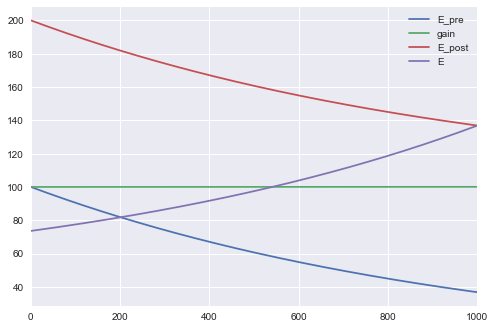

In [43]:
df.plot.line()

So we see that the later in the lottery the better the house fares.  And the house at position \#1000 has an expected value of \$136.869606.

In [52]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def plot_expected_values(N=1000):
    X = 100
    def p(n, N):
        """The probability of not being robbed in `n` turns,given each turn picks one house
        at random from `N` houses."""
        return np.power((N-1)/N, n)

    r = np.arange(1, N+1)
    # expected value at the start of turn
    E_pre = p(r-1, N) * X

    # expected gain
    G = p(r-1, N)*X + (1-p(r-1, N))*N*X/(N-1)

    # exected value at the end of the turn
    E_post = E_pre + G

    # expected value at the end of all rounds
    E = E_post * p(N-r, N)
    
    df = pd.DataFrame(data={'E_pre': E_pre, 'gain': G, 'E_post': E_post, 'E': E}, index=r, 
                  columns=['E_pre', 'gain', 'E_post', 'E'])
    ax = df.plot.line()
    ax.set_title('N = {}'.format(N), fontsize=18)
    ax.set_ylim(bottom=0)
    plt.show()


interact(plot_expected_values, N=widgets.IntSlider(min=2,max=1000,step=1,value=100));